In [1]:
from datasets.virus import ViralDataset
from Bio import SeqIO
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data/spikeprot0430'
set_size = 16
lines_to_read = 10**8

fn = data_dir+'/spikeprot0430.fasta'
seqs_by_monthloc = defaultdict(list)
max_per_monthloc = set_size  # cap per group

record_iterator = SeqIO.parse(fn, "fasta")

for _ in tqdm(range(lines_to_read)):
    try:
        record = next(record_iterator)
        fields = record.description.split("|")
        (gene, isolate, date, iso_id, passage,
        type_loc, host, o_lab, s_lab,
        submitter, location) = (fields + ["?"] * 11)[:11]

        # print(submitter)
        # print(o_lab)
        # print(s_lab)
        # print()

        virus_type, state = type_loc.split("^^") if "^^" in type_loc else (type_loc, "?")

        if date[5:7] != '00' and date[-2:] != '00' and date[4] == '-':
            key = date[:7] + '-' + o_lab  # yyyy-mm-location
            if len(seqs_by_monthloc[key]) < max_per_monthloc:
                seqs_by_monthloc[key].append(str(record.seq))
    except:
        continue


  0%|                                                                                                                                                            | 0/100000000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000000/100000000 [01:39<00:00, 1005742.92it/s]


In [4]:
count_dict = {}
for key, seqs in seqs_by_monthloc.items():
    count_dict[key] = len(seqs)

(array([41525., 19338., 12183.,  9089.,  7083.,  5807.,  4568.,  3962.,
         3564.,  3189.,  2698.,  2591.,  2159.,  2034.,  1965., 56838.]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <BarContainer object of 16 artists>)

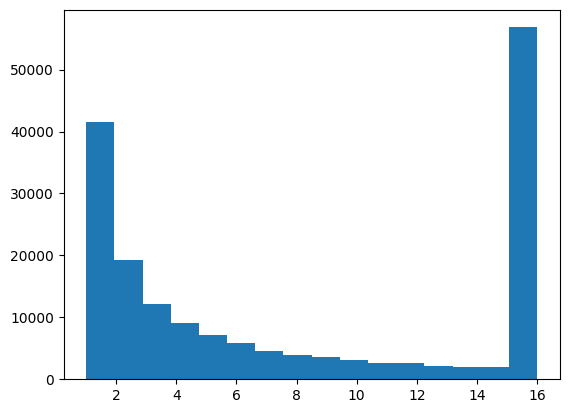

In [5]:
plt.hist(count_dict.values(), bins=16)

In [6]:
sum(list(count_dict.values()))

1407197